## Imports

In [3]:
#general imports
import pandas as pd
import numpy as np

#statsmodels for regression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

#scipy for testing
from scipy import stats

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime


## Bike Data

In [4]:
df_bikes = pd.read_csv('philadelphia_2017.csv')
df_weather = pd.read_csv('weather_hourly_philadelphia.csv')

df_bikes.head()

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name
0,1/1/2017 0:05,1/1/2017 0:16,3046,3041,5347,Indego30,2nd & Market,"Girard Station, MFL"
1,1/1/2017 0:21,1/1/2017 0:57,3110,3054,3364,Walk-up,Del. River Trail & Penn St.,Rodin Museum
2,1/1/2017 0:22,1/1/2017 0:57,3110,3054,2536,Walk-up,Del. River Trail & Penn St.,Rodin Museum
3,1/1/2017 0:27,1/1/2017 0:39,3041,3005,5176,Indego30,"Girard Station, MFL","Welcome Park, NPS"
4,1/1/2017 0:28,1/1/2017 0:36,3047,3124,5370,Walk-up,"Independence Mall, NPS",Race Street Pier


In [5]:
df_bikes.describe()

,start_station_id,end_station_id,bike_id
count,788907.000000,788907.000000,788907.000000
mean,3057.400081,3056.431487,5428.980913
std,41.126829,41.108792,3221.972215
min,3000.000000,3000.000000,0.000000
25%,3023.000000,3023.000000,3350.000000
50%,3050.000000,3049.000000,3703.000000
75%,3075.000000,3074.000000,5370.000000
max,3170.000000,3170.000000,11965.000000


## Weather Data

In [6]:
df_weather.head()

,date_time,max_temp,min_temp,precip
0,2015-01-02 01:00:00,3.3,3.3,0.0
1,2015-01-02 02:00:00,2.8,2.8,0.0
2,2015-01-02 03:00:00,2.2,2.2,0.0
3,2015-01-02 04:00:00,0.6,0.6,0.0
4,2015-01-02 05:00:00,1.1,1.1,0.0


In [7]:
df_weather.describe()

,max_temp,min_temp,precip
count,43785.000000,43785.000000,43785.000000
mean,14.204796,14.121300,0.087770
std,10.272673,10.259344,0.282963
min,-16.700000,-16.700000,0.000000
25%,6.100000,6.100000,0.000000
50%,15.000000,14.400000,0.000000
75%,22.800000,22.800000,0.000000
max,36.700000,36.700000,1.000000


In [8]:
"""
Die Funktion ist an sich jetzt richtig, die Wetterdaten müssen nur noch sortiert werden, hab ich jetzt leider nicht gerafft,
dass sie es nicht gemacht haben / die Daten extra kaputt gemacht haben :D
"""
def get_datetime(date_string):
    new_string = ""
    running_string = ""
    for char in date_string:
        if char == "/" or  char == ":" or char == " ":
            if len(running_string) == 1:
                running_string = "0" + running_string
            new_string += running_string + char
            running_string = ""
        else:
            running_string += char
    new_string += running_string
    if len(new_string) > 16:
        return datetime.strptime(new_string, '%m/%d/%Y %H:%M:%S')
    else:
        return datetime.strptime(new_string, '%m/%d/%Y %H:%M')

def would_be_rounded_up(num):
    if round(num) == int(num) + 1:
        return True
    else:
        return False

def get_temperature(start_time, end_time):
    duration_of_travel = end_time-start_time
    average_timestamp = end_time - datetime.fromisoformat("2017-01-01 00:00:00") - duration_of_travel/2
    weather_row = 17521 + average_timestamp.total_seconds()/3600
    as_int = int(weather_row)
    if would_be_rounded_up(weather_row):
        rows = [[df_weather["min_temp"][as_int],df_weather["max_temp"][as_int]], [df_weather["min_temp"][as_int+1],df_weather["max_temp"][as_int+1]]]
    else:
        rows = [[df_weather["min_temp"][as_int],df_weather["max_temp"][as_int]], [df_weather["min_temp"][as_int-1],df_weather["max_temp"][as_int-1]]]
    result = 0;
    avg_temp = (rows[0][0] + rows[0][1]) / 2
    result += avg_temp/(weather_row - int(weather_row))
    avg_temp = (rows[1][0] + rows[1][1]) / 2
    result += avg_temp/(1 - weather_row - int(weather_row))

    return result



def temperature_at_time(start_time, end_time):
    start_time = get_datetime(start_time)
    end_time = get_datetime(end_time)
    print(start_time)
    print(get_temperature(start_time, end_time))





temperature_at_time(df_bikes["start_time"][10000],df_bikes["end_time"][10000])



2017-01-13 06:34:00
16.243590901009362


In [9]:
unique_station_ids = set(df_bikes['start_station_id'])
id_mapped_to_station = []
for id in unique_station_ids:
    this_station = []
    this_station.append(id)
    this_station.append(df_bikes.loc[df_bikes['start_station_id'] == id].iloc[0]['start_station_name'])
    id_mapped_to_station.append(this_station)
print(id_mapped_to_station)


[[3072, 'Front & Carpenter'], [3073, '9th & Spring Garden'], [3074, '44th & Walnut'], [3075, 'Fairmount & Ridge'], [3077, '17th & Girard'], [3078, '19th & Market'], [3083, '3083'], [3086, 'Broad & Christian'], [3088, '3rd & Girard'], [3093, '33rd & Diamond'], [3095, '29th & Diamond'], [3096, '29th & Dauphin'], [3097, 'Berks Station, MFL'], [3098, '10th & Federal'], [3099, '4th & Washington'], [3100, 'Moyamensing & Tasker'], [3101, '11th & South'], [3102, 'Pennsylvania & Fairmount Perelman Building'], [3103, '27th & Master, Athletic Recreation Center'], [3104, '34th & Mantua'], [3105, 'Penn Treaty Park'], [3106, '33rd & Dauphin'], [3107, '33rd & Reservoir'], [3108, '15th & Market'], [3109, 'Parkside & Girard'], [3110, 'Del. River Trail & Penn St.'], [3111, 'Parkside & Belmont, Case Building'], [3112, '48th & Spruce'], [3113, 'Philadelphia Zoo'], [3114, '22nd & Federal'], [3115, '19th & Girard, PTTI'], [3116, 'Barnes Foundation'], [3117, 'ParkWest Town Center'], [3118, '46th Street Stati

In [34]:
# das noch mit den Ids oder Namen der Stations matchen
starting_id_amount_loans = []
for id in unique_station_ids:
    starting_id_amount_loans.append(sum(1 for i in df_bikes['start_station_id'] if i == id))
print(starting_id_amount_loans)

[4674, 6124, 5374, 5451, 2214, 10971, 10, 5653, 2802, 769, 1605, 990, 2628, 4731, 4372, 6517, 13888, 11755, 1095, 1836, 1169, 1206, 1394, 13004, 1402, 3423, 1691, 4840, 859, 6487, 3161, 48, 879, 2494, 2092, 5455, 5637, 844, 1339, 5178, 10237, 4049, 1662, 782, 1483, 3459, 1269, 5723, 2228, 2879, 4064, 2786, 4522, 3733, 4718, 588, 971, 133, 967, 3636, 110, 9020, 4688, 7828, 12102, 2966, 11430, 23655, 4242, 15344, 4919, 1892, 6552, 754, 1413, 11657, 4099, 16036, 19828, 14391, 24828, 5001, 6628, 8498, 4577, 12775, 11648, 9002, 6071, 16343, 8485, 7854, 5434, 2810, 6744, 10015, 5111, 9965, 4333, 5319, 19222, 9380, 9071, 5591, 7454, 9335, 12305, 8139, 16405, 6208, 8989, 14204, 9967, 8090, 8406, 10236, 6611, 12844, 9215, 1426, 10832, 750, 7750, 6370, 5396, 4394]


D:\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


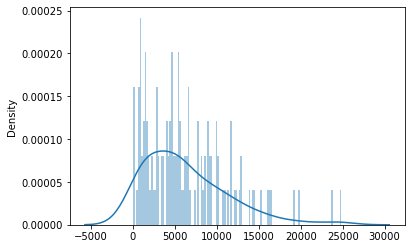

In [45]:
# keine Ahnung was da angezeigt wird, aber dachte es könnte nice sein
sns.distplot(starting_id_amount_loans, bins=unique_station_ids.__len__(),kde=True)
plt.show()

In [35]:
# das noch mit den Ids oder Namen der Stations matchen
ending_id_amount_loans = []
for id in unique_station_ids:
    ending_id_amount_loans.append(sum(1 for i in df_bikes['end_station_id'] if i == id))
print(ending_id_amount_loans)


[5523, 5988, 5021, 4356, 1587, 11165, 152, 5726, 3391, 639, 1541, 934, 3255, 4939, 4559, 7639, 14176, 11729, 1018, 1520, 1204, 1208, 1163, 13166, 1294, 3879, 1637, 3832, 798, 6430, 2165, 76, 775, 2547, 1943, 5074, 4076, 746, 1179, 5625, 9917, 3815, 1809, 628, 1475, 3173, 1315, 5695, 2375, 2962, 3609, 2110, 4456, 3806, 4864, 697, 989, 143, 967, 3482, 6255, 9503, 5225, 6611, 12460, 2722, 12244, 23599, 3323, 14196, 4686, 1896, 6803, 773, 1520, 11998, 3852, 14666, 24742, 14585, 25452, 5137, 6546, 9402, 3590, 14329, 11322, 9062, 5475, 16330, 8725, 8269, 3635, 3125, 7701, 9500, 4023, 8211, 4961, 5431, 19190, 9754, 9704, 6552, 7456, 7793, 12628, 8198, 16989, 5923, 8567, 14288, 7851, 7406, 9146, 10731, 6973, 12306, 8413, 1205, 9954, 548, 7544, 6746, 5603, 3592]


Text(0, 0.5, 'EndID')

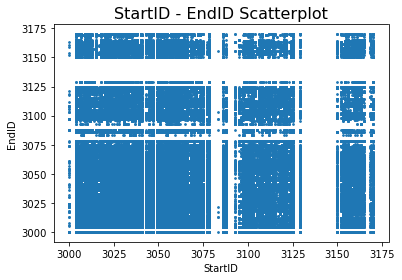

In [52]:
#Schade, ich erkenne kein Muster :D
fig, scplot_ids = plt.subplots(nrows=1, ncols=1)
scplot_ids.scatter(df_bikes['start_station_id'], df_bikes['end_station_id'],s=3)
scplot_ids.set_title("StartID - EndID Scatterplot", fontsize=16)
scplot_ids.set_xlabel("StartID")
scplot_ids.set_ylabel("EndID")
#scplot_ids.show()

In [10]:
# Zeiten in Daytime umgewandelt und Leihdauer hinzugefügt
df_bikes["start_time"] = pd.to_datetime(df_bikes["start_time"], dayfirst = True)

df_bikes["end_time"] = pd.to_datetime(df_bikes["end_time"], dayfirst = True)

df_bikes['duration'] = df_bikes['end_time'] - df_bikes['start_time']

df_bikes.head()


,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,duration
0,2017-01-01 00:05:00,2017-01-01 00:16:00,3046,3041,5347,Indego30,2nd & Market,"Girard Station, MFL",0 days 00:11:00
1,2017-01-01 00:21:00,2017-01-01 00:57:00,3110,3054,3364,Walk-up,Del. River Trail & Penn St.,Rodin Museum,0 days 00:36:00
2,2017-01-01 00:22:00,2017-01-01 00:57:00,3110,3054,2536,Walk-up,Del. River Trail & Penn St.,Rodin Museum,0 days 00:35:00
3,2017-01-01 00:27:00,2017-01-01 00:39:00,3041,3005,5176,Indego30,"Girard Station, MFL","Welcome Park, NPS",0 days 00:12:00
4,2017-01-01 00:28:00,2017-01-01 00:36:00,3047,3124,5370,Walk-up,"Independence Mall, NPS",Race Street Pier,0 days 00:08:00


In [11]:
df_bikes.notnull()

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,duration
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
788902,True,True,True,True,True,True,True,True,True
788903,True,True,True,True,True,True,True,True,True
788904,True,True,True,True,True,True,True,True,True
788905,True,True,True,True,True,True,True,True,True


In [12]:
df_bikes.dropna(axis=0,inplace=True)
len(df_bikes)-len(df_bikes.dropna())

0

In [13]:
# da hat sich jemand gegönnt :D
max(df_bikes['duration'])


Timedelta('91 days 16:29:00')

In [14]:
# auch nicht schlecht
min(df_bikes['duration'])


Timedelta('-323 days +00:14:00')

In [15]:
sumIndego30 = sum(1 for i in df_bikes["user_type"] if i == 'Indego30')
sumIndego30


667441

In [16]:
sumWalkUp = sum(1 for i in df_bikes["user_type"] if i == 'Walk-up')
sumWalkUp


100661

In [17]:
# gibt also noch mehr Modelle
sumIndego30 + sumWalkUp

768102

In [18]:
sumIndegoFlex = sum(1 for i in df_bikes["user_type"] if i == 'IndegoFlex')
sumIndegoFlex


6034

In [19]:
sumOneDayPass = sum(1 for i in df_bikes["user_type"] if i == 'One Day Pass')
sumOneDayPass


6328

In [20]:
sumIndego365 = sum(1 for i in df_bikes["user_type"] if i == 'Indego365')
sumIndego365


6840

In [31]:

sumIndego30 + sumWalkUp + sumIndegoFlex + sumOneDayPass + sumIndego365 + sumTwoDayPass


788907

In [29]:
unique_user_type = set(df_bikes['user_type'])
unique_user_type


{'Indego30',
 'Indego365',
 'IndegoFlex',
 'One Day Pass',
 'Two Day Pass',
 'Walk-up'}

In [30]:
sumTwoDayPass = sum(1 for i in df_bikes["user_type"] if i == 'Two Day Pass')
sumTwoDayPass

1603

In [32]:
user_type_dict = {'Indego30': sumIndego30,
                  'WalkUp': sumWalkUp,
                  'IndegoFlex': sumIndegoFlex,
                  'OneDayPass': sumOneDayPass,
                  'TwoDayPass': sumTwoDayPass,
                  'Indego365': sumIndego365
                  }

user_type = pd.Series(user_type_dict)
user_type

Indego30      667441
WalkUp        100661
IndegoFlex      6034
OneDayPass      6328
TwoDayPass      1603
Indego365       6840
dtype: int64

In [23]:
##Wetter für 2017 in Philly
df_weather["date_time"] = pd.to_datetime(df_weather["date_time"])

start2017 = datetime(2017, 1, 1)
end2017 = datetime(2017, 12, 31)

df_2017weather = df_weather[(df_weather["date_time"] >= start2017) & (df_weather["date_time"] <= end2017)]
df_2017weather.tail()


,date_time,max_temp,min_temp,precip
26275,2017-12-30 20:00:00,-3.3,-3.3,0.0
26276,2017-12-30 21:00:00,-2.2,-2.2,0.0
26277,2017-12-30 22:00:00,-2.8,-2.8,0.0
26278,2017-12-30 23:00:00,-3.3,-3.3,0.0
26279,2017-12-31 00:00:00,-4.4,-4.4,0.0


In [24]:
df_2017weather.notnull()

,date_time,max_temp,min_temp,precip
17520,True,True,True,True
17521,True,True,True,True
17522,True,True,True,True
17523,True,True,True,True
17524,True,True,True,True
...,...,...,...,...
26275,True,True,True,True
26276,True,True,True,True
26277,True,True,True,True
26278,True,True,True,True


In [25]:
#ka warum der da kein Bock drauf hat
df_2017weather.dropna(axis=0,inplace=True)


<ipython-input-25-b4154f8ddddb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017weather.dropna(axis=0,inplace=True)


In [26]:
# Werte für Temperaturen scheinen in Ordnung zu sein
max(df_weather["max_temp"])


36.7

In [27]:
min(df_weather["max_temp"])


-16.7